In [3]:
import pandas as pd
import numpy as np
from mod_genetic import run_genetic as rg
from mod_packs import quantum_potential as qp
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
price_df = pd.read_excel('PRICE INDEX.xlsx').dropna().set_index('Date')
price_val = price_df.T.values
names = [price_df.columns[i][:3] for i in range(8)]
names.append('Optimized Portfolio')   

In [5]:
inds = pd.read_csv('portfos').T
ind1 = inds[inds.columns[1]].values[1:]/100
port_return = qp.ind_generator([qp.scaled_return(price_val[i],1) for i in range(8)] , ind1)
port_std = np.std(port_return)
port_risk = qp.risk_data_input(port_return , 0.0005)
port_risk = port_risk[1] - port_risk[0]
port_risk

0.07588748098274488

# Risk using quantum potential and STD

In [6]:
each_market_risk = {}
each_market_std = {}
for i in range(8):
    daily_ret = qp.scaled_return(price_val[i] , 1)
    daily_risk = qp.risk_data_input(daily_ret , 0.0005)
    std = np.std(daily_ret)
    each_market_risk.update({str(names[i]):daily_risk[-1]-daily_risk[0]})
    each_market_std.update({str(names[i]):std})
each_market_risk.update({'Optimized Portfolio':port_risk})
each_market_std.update({'Optimized Portfolio':port_std})
    
market_risk_values = np.array([each_market_risk[i] for i in each_market_risk.keys()])
market_std_values = np.array([each_market_std[i] for i in each_market_std.keys()])

market_risk_values/= max(market_risk_values)
market_std_values/= max(market_std_values)
risk_df = pd.DataFrame({'Risk':market_risk_values} , names )
std_df = pd.DataFrame({'STD':market_std_values} , names )
tot_df = risk_df.join(std_df['STD'])
tot_df = tot_df.sort_values('Risk',ascending=False)    

# Matplotlib toolkits

In [7]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

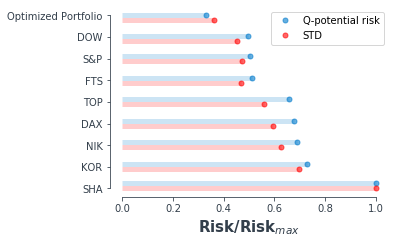

In [10]:
fig, ax = plt.subplots(figsize=(5,3.5))
my_range=list(tot_df.index)  
ran1 = [0.23, 1.13, 2.135, 3.138, 4.135, 5.13, 6.13, 7.03 , 8 ]
ran2 = [0  , 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.8 , 7.77]
width = 0.1
plt.hlines(y=ran1, xmin=0, xmax=tot_df['Risk'], color='#007acc', alpha=0.2, linewidth=5)
plt.hlines(y=ran2, xmin=0, xmax=tot_df['STD'], color='red', alpha=0.2, linewidth=5)

plt.plot(tot_df['Risk'], ran1, "o", markersize=5, color='#007acc', alpha=0.6 , label='Q-potential risk')
plt.plot(tot_df['STD'], ran2, "o", markersize=5, color='red', alpha=0.6 , label='STD')

plt.legend()
ax.set_xlabel('Risk'+'/' +'Risk'r'$_{max}$', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')
plt.yticks(np.arange(9) ,my_range)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('fig1.png', dpi=300, bbox_inches='tight')

AttributeError: 'Rectangle' object has no property 'markersize'

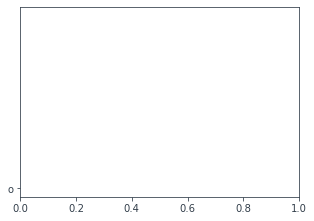

In [14]:
fig, ax = plt.subplots(figsize=(5,3.5))
# my_range=list(tot_df.index)  
# ran1 = [0.23, 1.13, 2.135, 3.138, 4.135, 5.13, 6.13, 7.03 , 8 ]
# ran2 = [0  , 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.8 , 7.77]
# width = 0.1
# plt.hlines(y=ran1, xmin=0, xmax=tot_df['Risk'], color='#007acc', alpha=0.2, linewidth=5)
# plt.hlines(y=ran2, xmin=0, xmax=tot_df['STD'], color='red', alpha=0.2, linewidth=5)

plt.bar(  tot_df['Risk'], "o", markersize=5, color='#007acc', alpha=0.6 , label='quantum risk')
plt.bar( tot_df['STD'],  "o", markersize=5, color='red', alpha=0.6 , label='STD')

# plt.legend()
# ax.set_xlabel('Risk'+'/' +'Risk'r'$_{max}$', fontsize=15, fontweight='black', color = '#333F4B')
# ax.set_ylabel('')
# plt.xticks(np.arange(9) ,my_range )
# plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# ax.spines['top'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.spines['left'].set_smart_bounds(True)
# ax.spines['bottom'].set_smart_bounds(True)
# plt.savefig('fig1.png', dpi=300, bbox_inches='tight')

In [65]:
umaxlist =[]
for i in each_market_risk.keys():
    umaxlist.append(each_market_risk[i])

In [67]:
max(umaxlist)

0.228858450570679

In [68]:
umaxstd = []
for i in each_market_std.keys():
    umaxstd.append(each_market_std[i])

In [70]:
max(umaxstd)

0.02320046769338043